In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
kickstarter = pd.read_csv('./Data_Files/kickstarter_make_EDA_graphs.csv')

In [25]:
kickstarter.shape

(207049, 28)

In [26]:
kickstarter.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'current_currency', 'deadline',
       'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name', 'pledged',
       'slug', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'state_successful',
       'main_category', 'child_category', 'cam_length', 'blurb_length'],
      dtype='object')

In [27]:
kickstarter.describe()

,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged,state_successful,cam_length,blurb_length
count,207049.000000,2.070490e+05,207049.000000,2.070490e+05,2.070490e+05,2.070490e+05,207049.000000,2.070490e+05,207049.000000,207049.000000,207049.000000
mean,136.686683,1.157873e+04,0.999263,4.414080e+04,1.074044e+09,1.416369e+04,1.016881,1.155609e+04,0.541514,32.995996,19.211732
std,890.951528,8.314121e+04,0.182331,1.075333e+06,6.188918e+08,2.322216e+05,0.210705,8.284452e+04,0.498275,12.271216,4.992601
min,0.000000,0.000000e+00,0.008779,1.000000e-02,8.624000e+03,0.000000e+00,0.008771,0.000000e+00,0.000000,0.000000,1.000000
25%,3.000000,9.100000e+01,1.000000,1.500000e+03,5.371622e+08,9.700000e+01,1.000000,9.100000e+01,0.000000,29.000000,17.000000
50%,24.000000,1.367000e+03,1.000000,5.000000e+03,1.075551e+09,1.372000e+03,1.000000,1.367142e+03,1.000000,30.000000,20.000000
75%,82.000000,6.000000e+03,1.000000,1.500000e+04,1.608816e+09,6.078000e+03,1.000000,6.000000e+03,1.000000,35.000000,23.000000
max,105857.000000,8.596474e+06,1.785406,1.000000e+08,2.147476e+09,8.103074e+07,1.716408,8.596475e+06,1.000000,92.000000,85.000000


In [28]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207049 entries, 0 to 207048
Data columns (total 28 columns):
backers_count               207049 non-null int64
blurb                       207046 non-null object
category                    207049 non-null object
converted_pledged_amount    207049 non-null int64
country                     207049 non-null object
created_at                  207049 non-null object
currency                    207049 non-null object
current_currency            207049 non-null object
deadline                    207049 non-null object
fx_rate                     207049 non-null float64
goal                        207049 non-null float64
id                          207049 non-null int64
launched_at                 207049 non-null object
location                    206388 non-null object
name                        207048 non-null object
pledged                     207049 non-null float64
slug                        207049 non-null object
spotlight             

In [29]:
kickstarter.corr()

,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,spotlight,staff_pick,static_usd_rate,usd_pledged,state_successful,cam_length,blurb_length
backers_count,1.000000,0.804285,0.005935,0.012691,-0.002764,0.312045,0.127866,0.164032,0.001722,0.805126,0.127866,0.000240,-0.008803
converted_pledged_amount,0.804285,1.000000,0.006916,0.012551,-0.001672,0.379173,0.115675,0.151451,0.000831,0.999534,0.115675,0.012291,-0.007939
fx_rate,0.005935,0.006916,1.000000,-0.032443,-0.004229,-0.063243,0.031949,0.007808,0.945484,0.006358,0.031949,-0.031217,0.013257
goal,0.012691,0.012551,-0.032443,1.000000,0.001225,0.133659,-0.032901,-0.004674,-0.028632,0.012724,-0.032901,0.026455,-0.006352
id,-0.002764,-0.001672,-0.004229,0.001225,1.000000,-0.003127,-0.001123,0.001561,-0.004359,-0.001693,-0.001123,0.003886,0.000436
pledged,0.312045,0.379173,-0.063243,0.133659,-0.003127,1.000000,0.049911,0.068852,-0.058179,0.380038,0.049911,0.007939,-0.007518
spotlight,0.127866,0.115675,0.031949,-0.032901,-0.001123,0.049911,1.000000,0.257697,0.016376,0.115818,1.000000,-0.129308,-0.004010
staff_pick,0.164032,0.151451,0.007808,-0.004674,0.001561,0.068852,0.257697,1.000000,0.007802,0.151884,0.257697,-0.017808,-0.012666
static_usd_rate,0.001722,0.000831,0.945484,-0.028632,-0.004359,-0.058179,0.016376,0.007802,1.000000,0.000888,0.016376,-0.034753,0.015891
usd_pledged,0.805126,0.999534,0.006358,0.012724,-0.001693,0.380038,0.115818,0.151884,0.000888,1.000000,0.115818,0.012267,-0.007943


In [40]:
kickstarter.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'current_currency', 'deadline',
       'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name', 'pledged',
       'slug', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'state_successful',
       'main_category', 'child_category', 'cam_length', 'blurb_length'],
      dtype='object')

In [44]:
kickstarter_numeric = kickstarter[['state_successful','backers_count','converted_pledged_amount','goal','staff_pick','cam_length','blurb_length']]

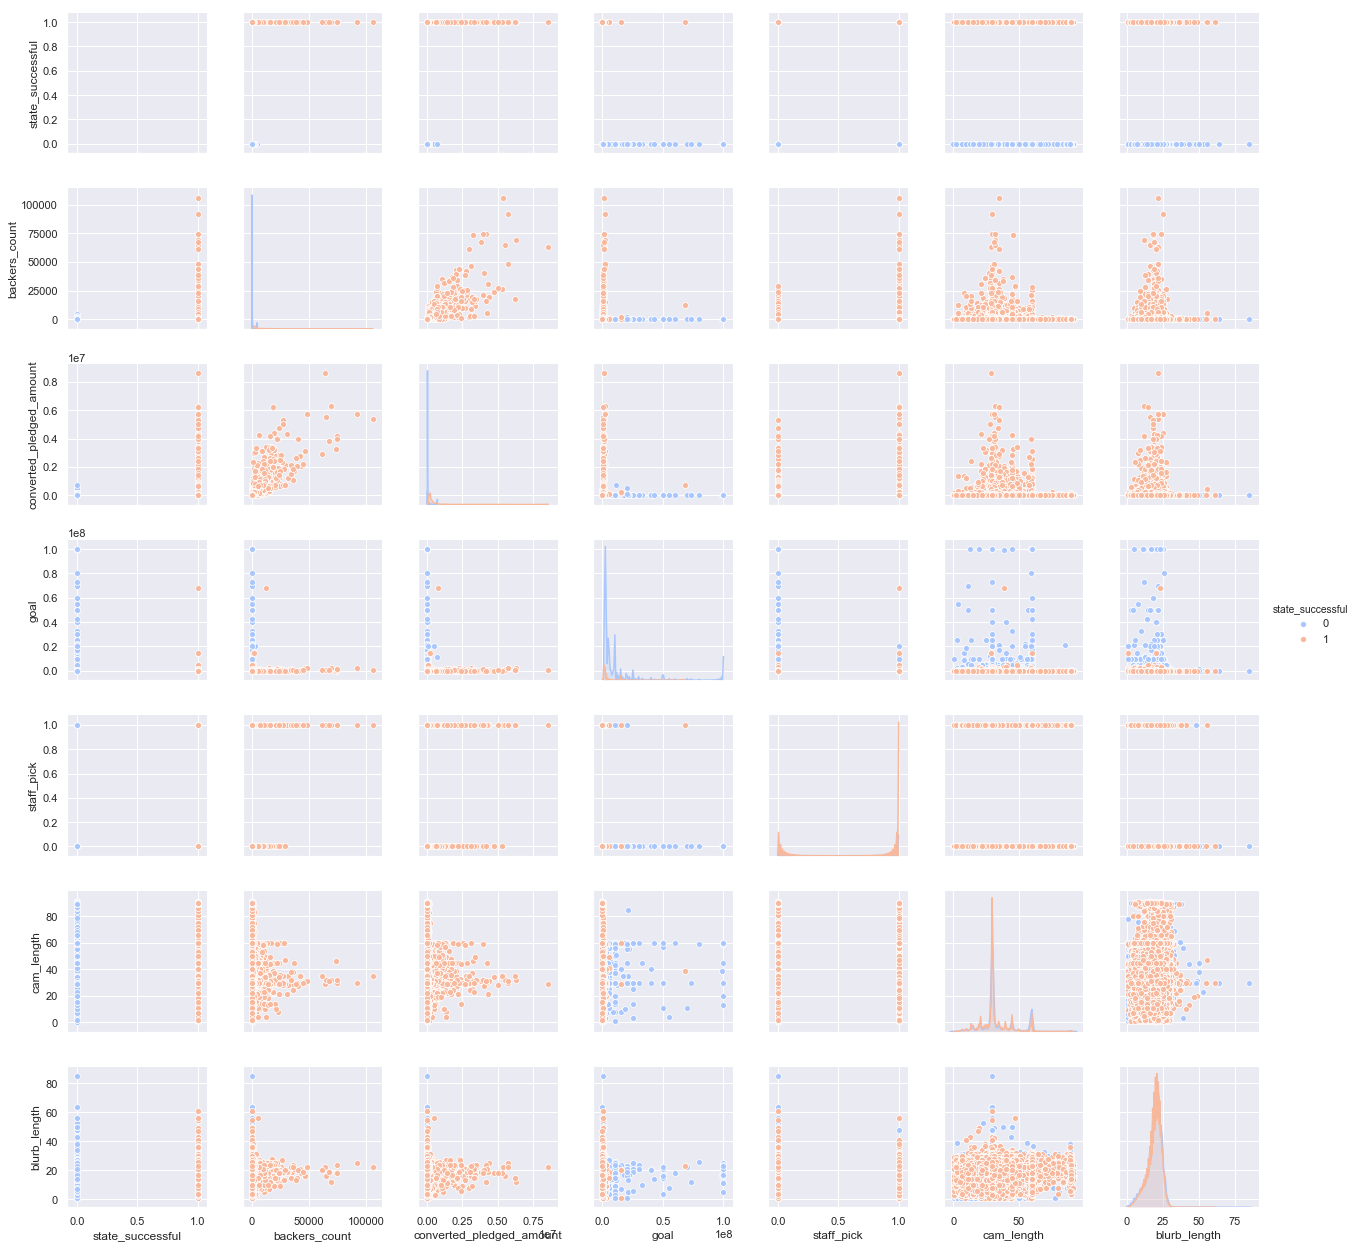

In [45]:
sns.set(font_scale=1) 
sns.pairplot(kickstarter_numeric,hue='state_successful',palette='coolwarm')

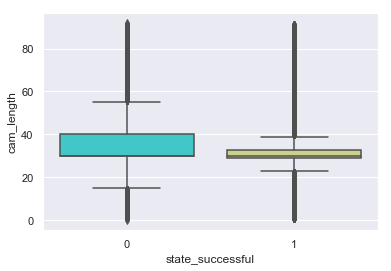

In [46]:
sns.boxplot(x="state_successful", y="cam_length", data=kickstarter,palette='rainbow')

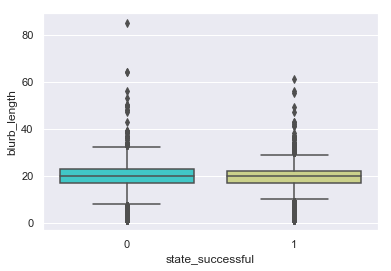

In [47]:
sns.boxplot(x="state_successful", y="blurb_length", data=kickstarter,palette='rainbow')

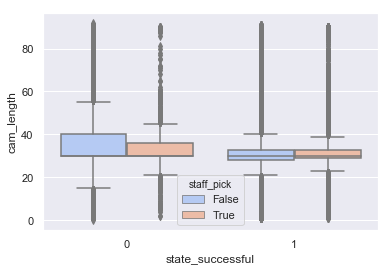

In [50]:
sns.boxplot(x="state_successful", y="cam_length", hue="staff_pick",data=kickstarter, palette="coolwarm")

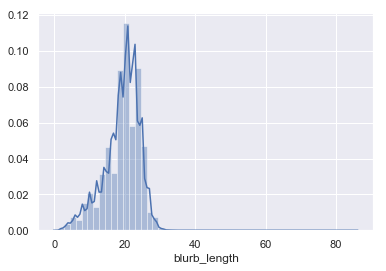

In [51]:
sns.distplot(kickstarter['blurb_length'])

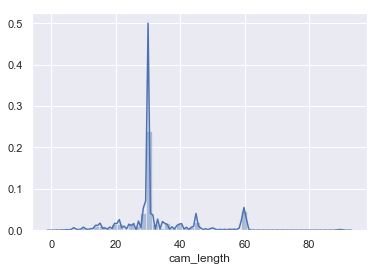

In [52]:
sns.distplot(kickstarter['cam_length'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

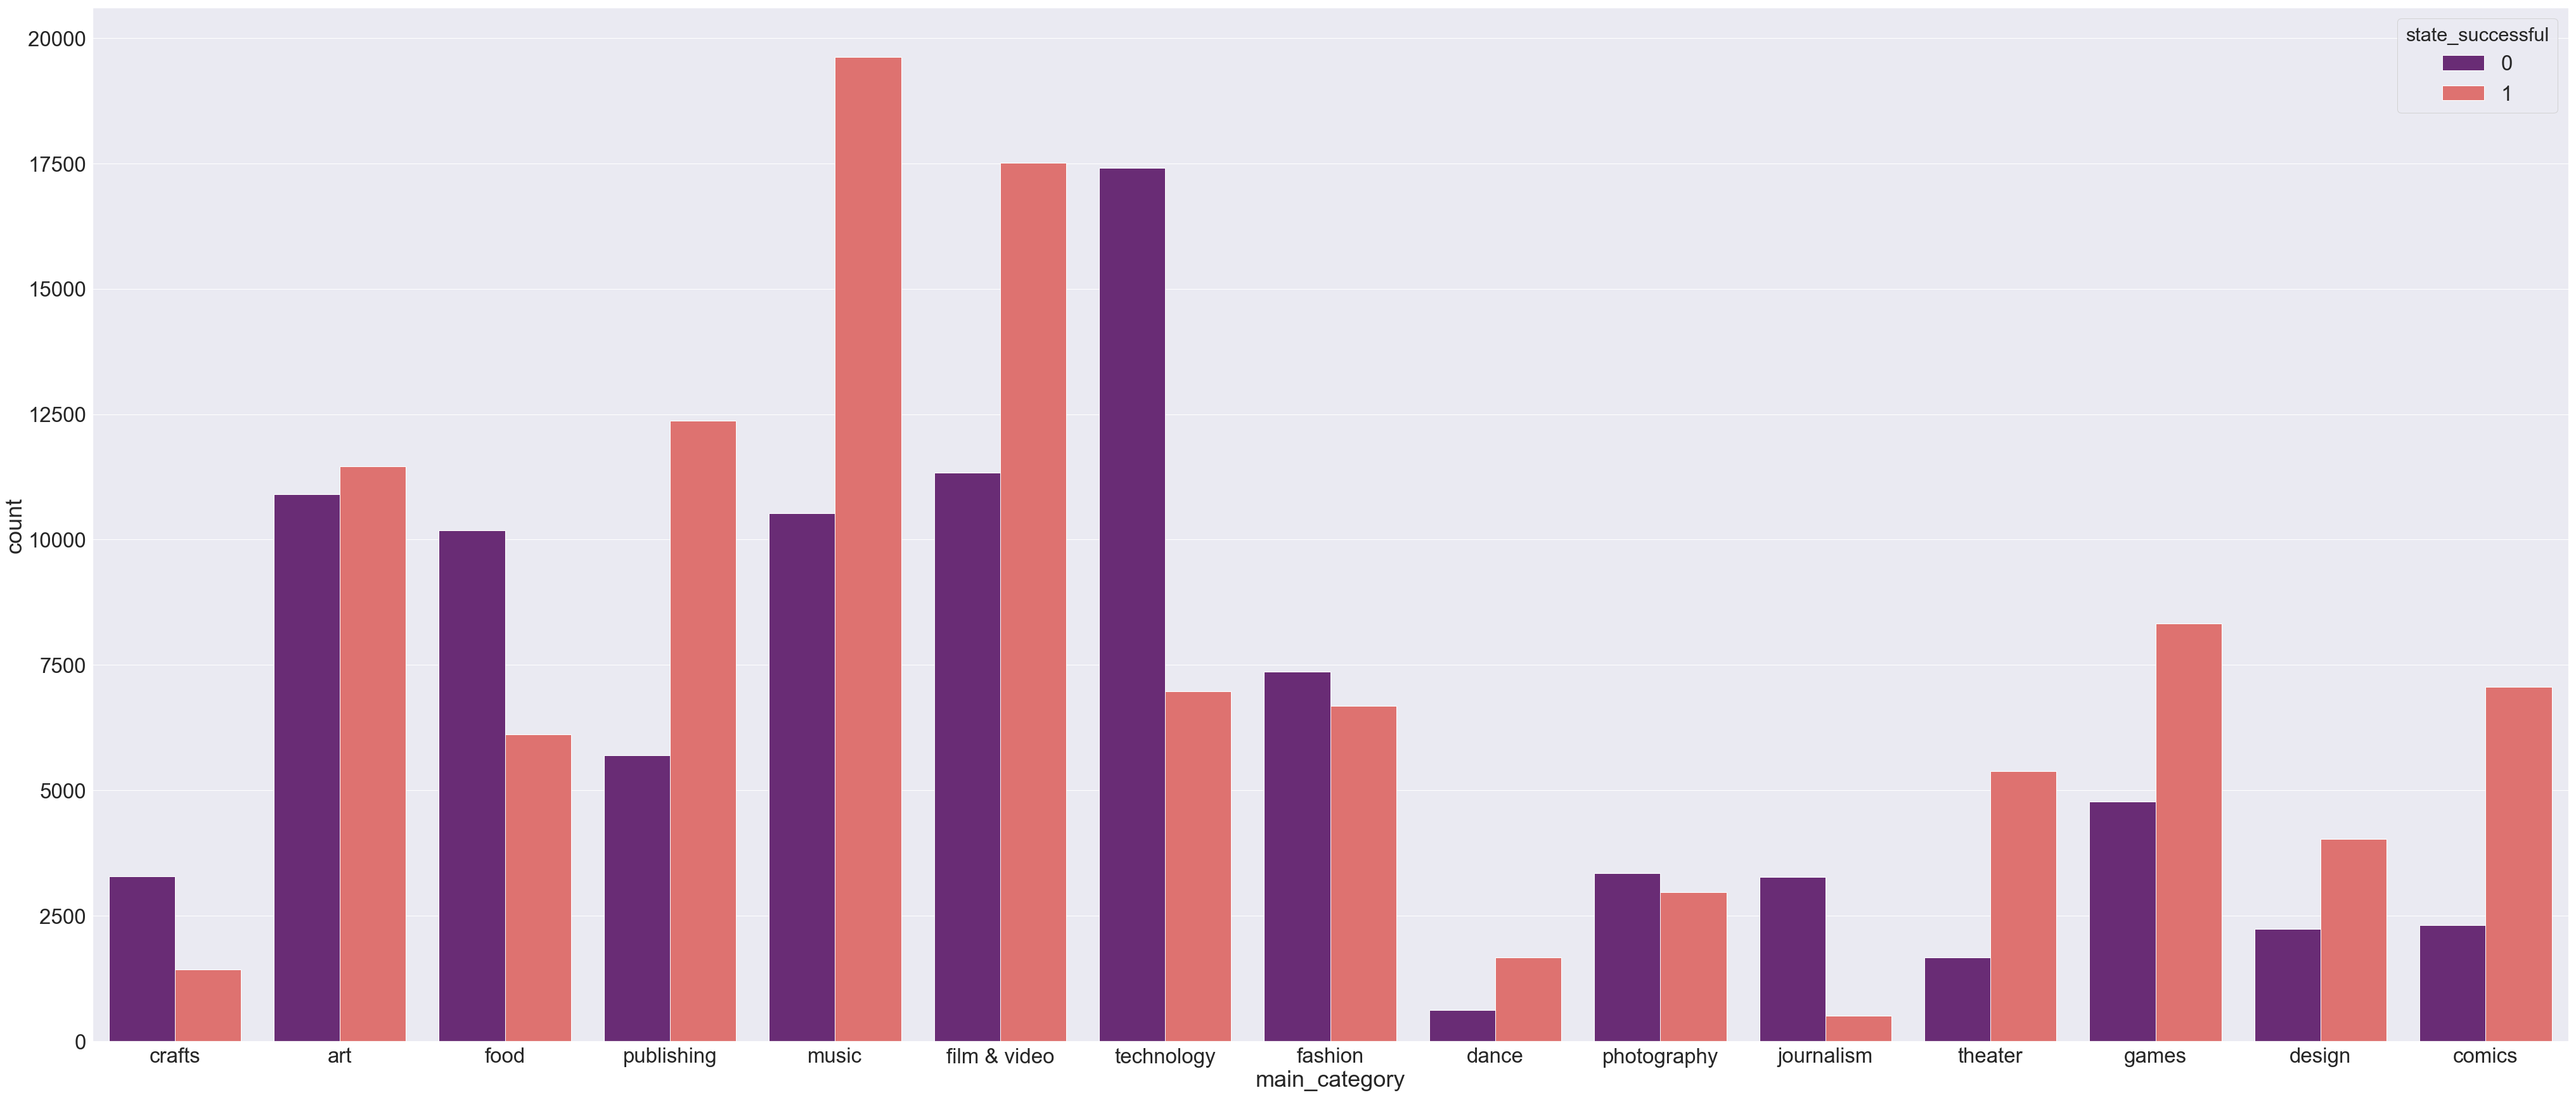

In [61]:
sns.set(font_scale=3) 
plt.figure(figsize=(70,30))
sns.countplot(x='main_category',hue = 'state_successful', data=kickstarter, palette = 'magma')
plt.tight_layout